<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Import Data & Add Packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('telecom_churn_data.csv')
df = pd.DataFrame(data)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let's take a look at what we're working with.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Let's keep area code and drop phone number. We can one-hot encode area code, however the phone numbers are high cardinality data and for our purposes they give a lot more detail (and require a lot more bandwidth) than we would like to work with.

Those are the only objects other than state. We'll one-hot encode state also.

Our target is churn, which is in boolean format.

Looks great. Next we'll explore and clean the data if need be. 



In [18]:
df.isnull().values.any()

False

Great! Looks like there aren't any null values.

Let's go ahead and drop the rows we aren't going to be using for this analysis.

In [19]:
# Feature to drop
drop = ['phone number']
# Drop feature
df = df.drop(drop,axis=1)

In [20]:
# Summary Statistics
df.describe().round()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.0,437.0,8.0,180.0,100.0,31.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,2.0
std,40.0,42.0,14.0,54.0,20.0,9.0,51.0,20.0,4.0,51.0,20.0,2.0,3.0,2.0,1.0,1.0
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,1.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,144.0,87.0,24.0,167.0,87.0,14.0,167.0,87.0,8.0,8.0,3.0,2.0,1.0
50%,101.0,415.0,0.0,179.0,101.0,30.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,1.0
75%,127.0,510.0,20.0,216.0,114.0,37.0,235.0,114.0,20.0,235.0,113.0,11.0,12.0,6.0,3.0,2.0
max,243.0,510.0,51.0,351.0,165.0,60.0,364.0,170.0,31.0,395.0,175.0,18.0,20.0,20.0,5.0,9.0


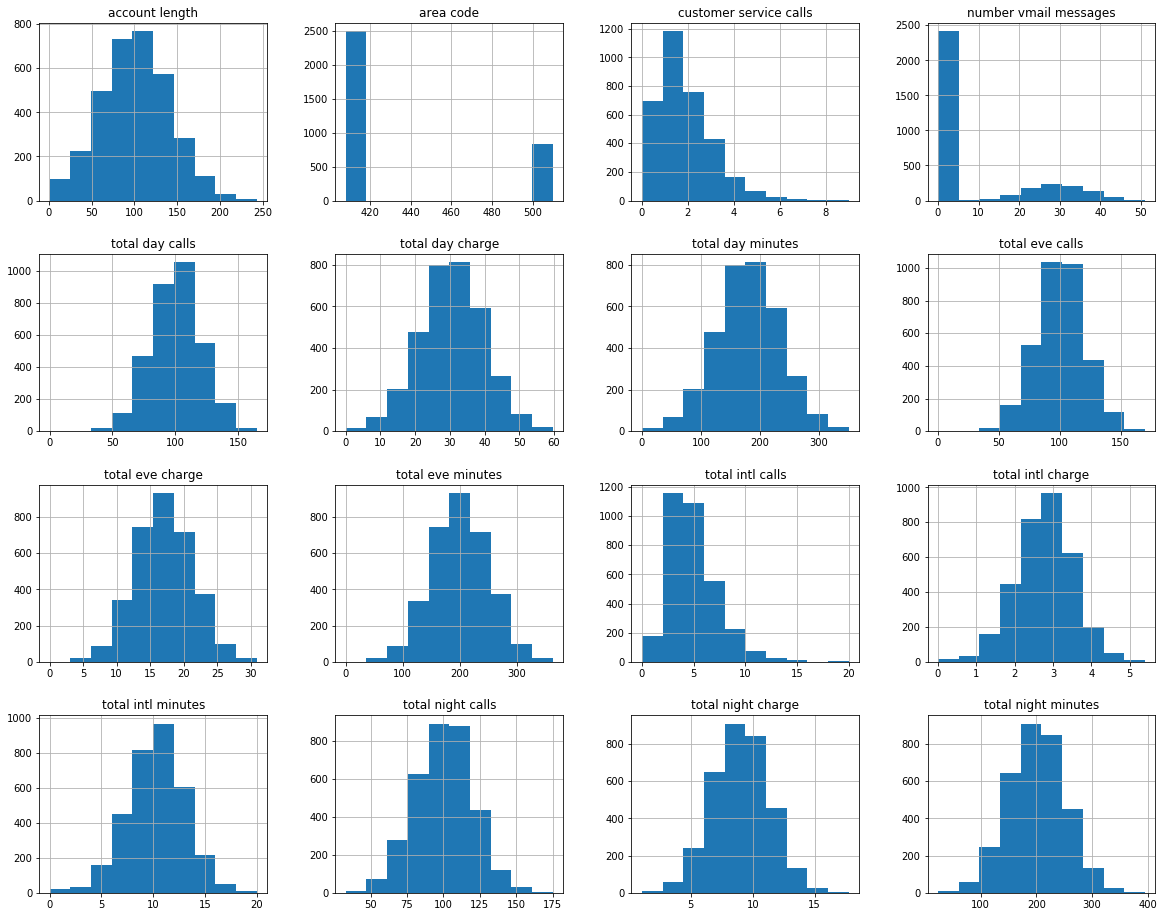

In [21]:
# Define which features are intergers/floats for histograms
hist_cols = ['account length',
             'area code',
             'number vmail messages',
             'total day minutes',
             'total day calls',
             'total day charge',
             'total eve minutes',
             'total eve calls',
             'total eve charge',
             'total night minutes',
             'total night calls',
             'total night charge',
             'total intl minutes',
             'total intl calls',
             'total intl charge',
             'customer service calls']

# Define figure size & axis
fig,ax = plt.subplots(figsize = (20,16))
# Plot histograms
df.hist(column=hist_cols,ax=ax);

Some of these features are skewed, e.g. customer service calls, international calls and international charges. 

We can see some of these appear to be directly correlated, which makes sense such as calls, charges and minutes. E.g. total day calls, charges, and minutes, international calls, charges and minutes, and night calls, charges and minutes. 

Since ensemble methods work best when predictors are as independent as possible, we will probably just keep one of each of the three when creating our ensemble.

Number of voicemail messages appears to be bimodal. We could bin them, but we'll see how the classifier goes and do so if necessary. 

Correlation Matrix

We want to see which features are correlated so we can remove redundant predictors.

In [22]:
abs(df.corr())>0.75

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area code,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number vmail messages,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total day minutes,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
total day calls,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
total day charge,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
total eve minutes,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
total eve calls,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
total eve charge,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
total night minutes,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


It seems the 'charge' categories are highly correlated with their respective 'minutes' categories, so let's go ahead and drop those.

In [23]:
drop = ['total day charge','total eve charge','total intl charge']
df = df.drop(drop, axis=1)

Let's take a look at the features that are non-continuous objects. 

States

In [24]:
df.state.describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

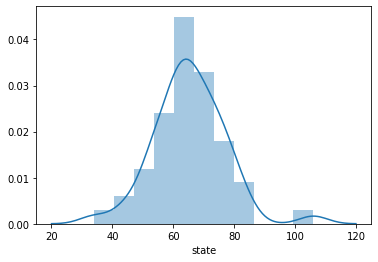

In [25]:
import seaborn as sns
sns.distplot(df.state.value_counts());

It looks like all states are represented, some more than others with West Virginia being the max at 106 out of 3333. 

In [26]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

It seems strange that with 51 states represented there are only 3 area codes. I did a little research as well as reading the dataset description and other kernels on kaggle, however this issue did not seem to be addressed anywhere. It could be that people had gotten a cell phone number in one state and then moved to another state. I'm not sure how likely that is, however this does seem like a relatively small data set at 3333, so it could be possible. 

In [27]:
df['account length'].describe().round()

count    3333.0
mean      101.0
std        40.0
min         1.0
25%        74.0
50%       101.0
75%       127.0
max       243.0
Name: account length, dtype: float64

I'm not sure if account length is in weeks or months. It seems too long to be years and too short to be days. It could also be some other metric. I did research this as well, and it seemed another person had asked what the units were in kaggle on the dataset page, however the question was never answered. It was not addressed in any of the kernels either. 

I did some web research as well and did not find what the unit of length is on account length.

Churn

Let's explore our target variable, churn. 

In [28]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [29]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

We can see there is a class imbalance here, so we'll want to address that by balancing the classes. 

One-hot-encode the categorical data

An alternative would be to use sklearn's OneHotEncoder.  

In [31]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,197.4,99,244.7,91,11.01,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,195.5,103,254.4,103,11.45,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,121.2,110,162.6,104,7.32,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,61.9,88,196.9,89,8.86,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,148.3,122,186.9,121,8.41,...,0,0,0,0,0,0,0,0,1,0


Separate predictor and target variables

In [32]:
# Define X and y variables
y = df['churn']
X = df.drop(['churn'], axis=1)

# Define Random State
seed = 20

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

Address the Class Imbalance

Address the class imbalance using SMOTE, synthetic oversampling of the minority class.

In [33]:
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

False    2136
True      363
Name: churn, dtype: int64


True     2136
False    2136
dtype: int64


Normalize

In [ ]:
# # Min-max scale
# from sklearn.preprocessing import MinMaxScaler

# scale = MinMaxScaler()
# X_train_transformed = scale.fit_transform(X_train)
# X_test_transformed = scale.transform(X_test)

Let's start modeling...

Models

Logistic Regression Classifier

In [75]:
# Import relevant packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Instantiate and fit model
logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear') 
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_hat_test = logreg.predict(X_test)

# Check false positive and true positive rates
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

Plot ROC curve.

Test Set AUC: 0.8027777777777779


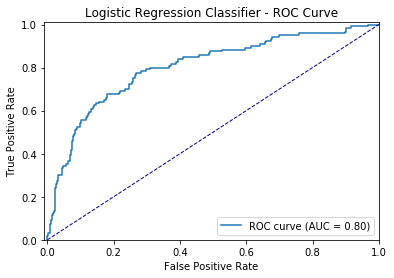

In [76]:
# Plot ROC curve

# Define function to plot ROC curve for classifiers
def ROC_curve(fpr,tpr,string):
    '''
    Input false positive rate, true positive rate and string
    to describe the classifier that was used.
    
    Returns ROC curve with AUC in lower right hand corner.
    
    '''
    # ROC curve
    plt.plot(fpr,tpr,label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
    # Threshold
    plt.plot([0, 1], [0, 1], color='navy', lw=1.0, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    # Labels & Title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{string} - ROC Curve')
    plt.legend(loc="lower right");
    
    # Print AUC
    print(f"Test Set AUC: {auc(fpr, tpr)}")
    
ROC_curve(fpr,tpr,'Logistic Regression Classifier')


 Confusion Matrix - Normalized: 
 


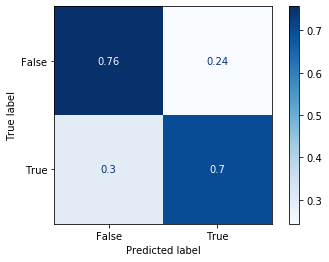

Confusion Matrix - Counts: 

 [[540 174]
 [ 36  84]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.94      0.76      0.84       714
        True       0.33      0.70      0.44       120

    accuracy                           0.75       834
   macro avg       0.63      0.73      0.64       834
weighted avg       0.85      0.75      0.78       834
 
 
Accuracy Score: 

 0.7482014388489209


In [81]:
# Import relevant package
from sklearn.metrics import plot_confusion_matrix

# Define function to return confusion matrix plots
# and Classification Report
def cms_and_report(y_test,y_hat_test,model):
    '''
    Print out and plot confusion matrices and classification report
    for model.
    
    Input y_test, y_hat_test & model.
    '''

    # Plot confusion matrix & normalize the True Label for False & True
    print(f"\n Confusion Matrix - Normalized: \n ")
    plot_confusion_matrix(model, X_test, y_test,cmap='Blues',normalize='true')
    plt.show()
    
    # Print confusion matrix by counts
    print(f"Confusion Matrix - Counts: \n\n {confusion_matrix(y_test, y_hat_test)} \n\n")
    
    # Print Classification Report
    print(f"Classification Report: \n\n {classification_report(y_test, y_hat_test)} \n ")
    
    # Accuracy Score
    print(f"Accuracy Score: \n\n {accuracy_score(y_test, y_hat_test)}")
    
cms_and_report(y_test,y_hat_test,logreg)

KNN

In [82]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the classifier
knn_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = knn_clf.predict(X_test)

# Check false positive and true positive rates
y_score = knn_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])

Test Set AUC: 0.7030345471521943


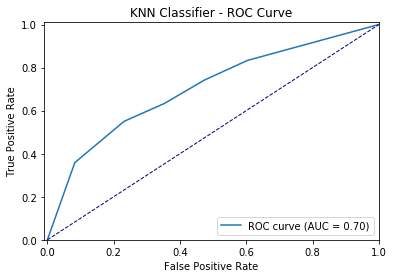

In [83]:
ROC_curve(fpr,tpr,'KNN Classifier')


 Confusion Matrix - Normalized: 
 


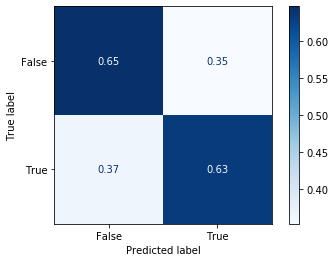

Confusion Matrix - Counts: 

 [[462 252]
 [ 44  76]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.91      0.65      0.76       714
        True       0.23      0.63      0.34       120

    accuracy                           0.65       834
   macro avg       0.57      0.64      0.55       834
weighted avg       0.82      0.65      0.70       834
 
 
Accuracy Score: 

 0.645083932853717


In [84]:
cms_and_report(y_test,y_pred,knn_clf)

Bagging Tree Classifier

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), #class_weight='balanced'), 
    n_estimators=100,
    max_samples=100, 
    bootstrap=True)

bag_clf.fit(X_train_resampled, y_train_resampled)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8453237410071942

In [86]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix: 
 [[600 114]
 [ 15 105]]


Looks like we're getting a substantial amount of false positives here. We'll tune these when we apply gridsearch further on. 

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.84      0.90       714
        True       0.48      0.88      0.62       120

    accuracy                           0.85       834
   macro avg       0.73      0.86      0.76       834
weighted avg       0.90      0.85      0.86       834



Bagging Classifier

In [88]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced',splitter='random', max_leaf_nodes=16), 
    n_estimators=5000,
    max_samples=100, 
    bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8657074340527577

Random Forest 

In [92]:
rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=65,
    n_jobs=-1)

rnd_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.9220623501199041

In [ ]:
print(classification_report(y_test, y_pred_rf))

XGBoost

Unbalanced Data

In [ ]:
import xgboost as xgb
classifier = xgb.XGBClassifier( ) 
classifier.fit = classifier.fit(X_train, y_train)
training_preds = classifier.predict(X_train)
validation_preds = classifier.predict(X_test)
training_accuracy = accuracy_score(y_train,training_preds)
validation_accuracy = accuracy_score(y_test,validation_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(validation_accuracy * 100))

Balanced Data

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=seed)

X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

classifier = xgb.XGBClassifier( ) 
classifier.fit = classifier.fit(X_train_resampled, y_train_resampled)
validation_preds = classifier.predict(X_test)
training_accuracy = accuracy_score(y_train,training_preds)
validation_accuracy = accuracy_score(y_test,validation_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(validation_accuracy * 100))

Classifiers w/Pipeline

Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('log_clf', LogisticRegression())
])

parameters = {
    'scaler__with_mean': [True, False],
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10, 100, 1000]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

In [ ]:
list(LogisticRegression().get_params().keys())

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Construct pipeline
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('pca', PCA(n_components=2)),
                 ('clf', LogisticRegression(random_state=seed))])

param_range = [1, 2, 3, 4, 5]

# Set grid search params
grid_params = [{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__max_depth': param_range,
                'clf__min_samples_split': param_range[1:],}]

# Construct grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=10)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import tree

# Construct pipeline
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('pca', PCA(n_components=2)),
                 ('clf', tree.DecisionTreeClassifier(random_state=seed))])

param_range = [1, 2, 3, 4, 5]

# Set grid search params
grid_params = [{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__max_depth': param_range,
                'clf__min_samples_split': param_range[1:],}]

# Construct grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=10)

# Fit using grid search
gs.fit(X_train_resampled, y_train_resampled)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dtr_clf', DecisionTreeClassifier(class_weight='balanced'))
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

Random Forest

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rnd_clf', RandomForestClassifier())
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=seed)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train_resampled, y_train_resampled, cv=10))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

In [ ]:
rf_param_grid = {
    'n_estimators': [10, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, param_range],
    'min_samples_split': param_range[1:],
    'min_samples_leaf': param_range}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Predict

In [ ]:
rf_clf_best = RandomForestClassifier(random_state=seed,
                                     criterion='gini', 
                                     max_depth=None, 
                                     min_samples_leaf=1, 
                                     min_samples_split=2, 
                                     n_estimators=100)

In [ ]:
rf_clf_best.fit(X_train_resampled, y_train_resampled)
y_pred = rf_clf_best.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

SVC

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm_clf', SVC())
])

parameters = {
    'scaler__with_mean': [True, False],
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)